In [1]:
import numpy as np
from numpy.random import randint
from enum import Enum
import PIL
from PIL import Image
import matplotlib.pyplot as plt

class NoiseTypes(Enum):
    """
    Enumeration type for different types of noises.
    
    SALT_AND_PEPPER: replaces random pixels with 0 or 1.
    GAUSSIAN: gaussian-distributed additive noise.
    POISSON: poisson-distributed noise generated from the data.
    SPECKLE: multiplicative noise using out = image + n * image, where n is uniform noise 
        with specified mean & variance.
    """
    SALT_AND_PEPPER = 1
    GAUSSIAN = 2
    POISSON = 3
    SPECKLE = 4


def noisify(image: np.array, noise_type: NoiseTypes, **kwargs) -> np.array:
    """
    Function adds selected randomly sampled noise to an image.
    Args:
        image (np.array): tensor representing an image
        noise_type (NoiseTypes): type of noise to use (e.g Gaussian, S&P, etc)
        amount (float): value within [0;1] range specifying ratio of all pixels in an image
            that will be distorted (only for Salt and Pepper noise).
        salt_vs_pepper (float): value within [0;1] that meet the equation 
            N_salt = salt_vs_pepper * N_distorted and
            N_pepper = (1 - salt_vs_pepper) * N_distorted. (only for Salt and Pepper noise).
    Returns:
        np.array: tensor representing the noised image
    """

    noised = np.copy(image).astype('float32')
    
    if noise_type == NoiseTypes.SALT_AND_PEPPER:
        salt_vs_pepper = float(kwargs.get('salt_vs_pepper', 0.5))
        amount = float(kwargs.get('amount', 0.01))

        if not (0.0 <= salt_vs_pepper <= 1.0 and 0.0 <= amount <= 1.0):
            raise ValueError('salt_vs_pepper and amount ratios must be within [0;1] range')
        
        H, W = image.shape[:2]
        num_distorted_pixels = H * W * amount

        num_salt_pixels = int(num_distorted_pixels * salt_vs_pepper)
        # salt i, j indices in an image
        noised[randint(0, H - 1, num_salt_pixels), randint(0, W - 1, num_salt_pixels)] = 255.0

        num_pepper_pixels = int(num_distorted_pixels * (1 - salt_vs_pepper)) 
        # pepper i, j indices in an image
        noised[randint(0, H - 1, num_pepper_pixels), randint(0, W - 1, num_pepper_pixels)] = 0.0
    elif noise_type == NoiseTypes.GAUSSIAN:
        noised = image + np.random.normal(loc=kwargs.get('mean', 0), scale=kwargs.get('stddev', 1), size=image.shape)
    elif noise_type == NoiseTypes.SPECKLE:
        noised = image + image * np.random.normal(loc=kwargs.get('mean', 0), scale=kwargs.get('stddev', 1), size=image.shape)
    elif noise_type == NoiseTypes.POISSON: 
        noised = np.random.poisson(lam=image, size=None)
    else:
        raise ValueError('Invalid noise type given. Must be one of NoiseTypes')
    
    return noised.astype('uint8')

(-0.5, 199.5, 49.5, -0.5)

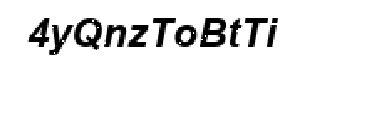

In [2]:
image = Image.open("./images_noise/4yQnzToBtTi.png")
noise = noisify(np.array(image), NoiseTypes.SALT_AND_PEPPER)
plt.imshow(noise, cmap="gray")
plt.axis('off')

(-0.5, 199.5, 49.5, -0.5)

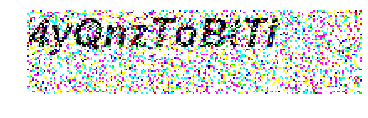

In [3]:
image = Image.open("./images_noise/4yQnzToBtTi.png")
noise = noisify(np.array(image), NoiseTypes.GAUSSIAN)
plt.imshow(noise, cmap="gray")
plt.axis('off')

(-0.5, 199.5, 49.5, -0.5)

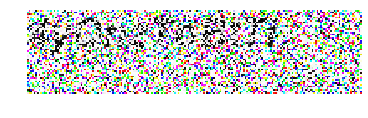

In [4]:
image = Image.open("./images_noise/4yQnzToBtTi.png")
noise = noisify(np.array(image), NoiseTypes.POISSON)
plt.imshow(noise, cmap="gray")
plt.axis('off')

(-0.5, 199.5, 49.5, -0.5)

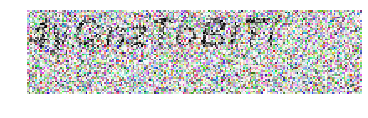

In [5]:
image = Image.open("./images_noise/4yQnzToBtTi.png")
noise = noisify(np.array(image), NoiseTypes.SPECKLE)
plt.imshow(noise, cmap="gray")
plt.axis('off')

In [6]:
from pathlib import Path
data_dir = Path("./images_noise/")

# Get list of all the images
images = sorted(list(map(str, list(data_dir.glob("*.png")))))
for img in images:
    my_image = Image.open(img)
    noise = noisify(np.array(my_image), NoiseTypes.SALT_AND_PEPPER)
    my_image = Image.fromarray(noise)
    my_image.save(img)

In [7]:
data_dir = Path("./images_noise2/")

# Get list of all the images
images = sorted(list(map(str, list(data_dir.glob("*.png")))))
for img in images:
    my_image = Image.open(img)
    noise = noisify(np.array(my_image), NoiseTypes.SALT_AND_PEPPER)
    my_image = Image.fromarray(noise)
    my_image.save(img)